In [3]:
import pandas as pd
import numpy as np

In [4]:
# Loading CSV file
df = pd.read_csv("h1b_kaggle.csv")
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
# Data Cleaning
# Check is there is any missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [6]:
df.shape

(3002458, 11)

In [7]:
df = df.drop(["lon", "lat"], axis= 1)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [8]:
df["YEAR"] = df["YEAR"].ffill()

In [15]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
# Drop all rows which has any NA value 
df.isna().sum()


Unnamed: 0                0
CASE_STATUS              13
EMPLOYER_NAME            59
SOC_NAME              17734
JOB_TITLE                43
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
YEAR                      0
WORKSITE                  0
dtype: int64

In [11]:
def drop_na_percent(df):
    na_values = df.isna().sum()
    frac_na_values = na_values / df.shape[0]
    return frac_na_values * 100

drop_na_percent(df)

Unnamed: 0            0.000000
CASE_STATUS           0.000433
EMPLOYER_NAME         0.001965
SOC_NAME              0.590649
JOB_TITLE             0.001432
FULL_TIME_POSITION    0.000500
PREVAILING_WAGE       0.002831
YEAR                  0.000000
WORKSITE              0.000000
dtype: float64

In [12]:
df.dropna(axis= 0, how = 'any', inplace = True)

In [13]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [14]:
# Reset index and check how many rows we have

df.reset_index (inplace = True)
df.drop('index', axis= 1, inplace = True)
df.shape[0]

2984609

In [15]:
len(df.index)

2984609

In [16]:
# Exploratory Data Analysis
# Top 15 hiring company(Employer Name)
df["EMPLOYER_NAME"].value_counts(ascending=True)[:2]

BAUDUCCO FOODS, INC.    1
NW GARDEN SUPPLY LLC    1
Name: EMPLOYER_NAME, dtype: int64

In [17]:
df[["EMPLOYER_NAME"]].value_counts().head(15)

EMPLOYER_NAME                                  
INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       46071
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           33852
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
LARSEN & TOUBRO INFOTECH LIMITED                    14480
IGATE TECHNOLOGIES INC.                             12564
IBM CORPORATION                                     12199
dtype: int64

In [18]:
Emp_name = df[["EMPLOYER_NAME"]].value_counts().head(15)

In [19]:
import matplotlib.pyplot as plt

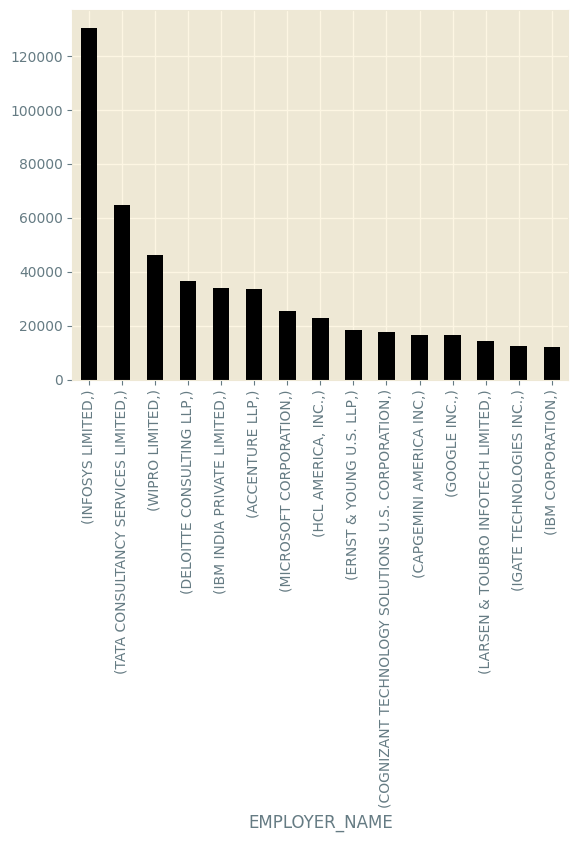

In [20]:
plt.style.use("Solarize_Light2")
fig= plt.figure(facecolor = 'white')
Emp_name.plot(kind= "bar", facecolor= "black")
plt.show()

In [21]:
# Top 15 companies which provide highest prevailing wage
df["PREVAILING_WAGE"].describe()

count    2.984609e+06
mean     1.469658e+05
std      5.296147e+06
min      0.000000e+00
25%      5.435000e+04
50%      6.500000e+04
75%      8.143200e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

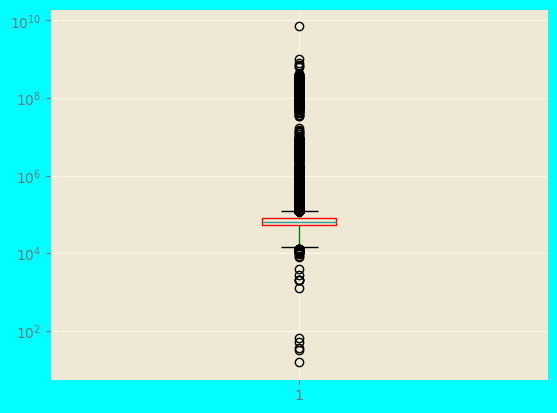

In [22]:
fig = plt.figure(facecolor= 'cyan')
plt.boxplot(df["PREVAILING_WAGE"], boxprops = dict(color = 'red'), whiskerprops=dict(color = 'green'))
plt.yscale ("log")
plt.show()

In [23]:
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].median().sort_values(ascending=False)[:15]

EMPLOYER_NAME
BAALAAJEE INC.                                 215109440.0
OMPI OF AMERICA INC.                           212987840.0
UROLOGY TODAY, LLC                             173139200.0
INNOBOX SYSTEMS                                172363360.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS         134702089.5
MANHATTAN SOFTWARE, INC.                       123907680.0
GYM-PACT CORP                                  123389760.0
BOOKRENTER.COM, INC.                           123032124.8
CATANIA, MAHON, MILLIGRAM &AMP; RIDER, PLLC    122697120.0
AGROPLASMA, INC                                122133440.0
RAMONA MEDICAL CLINIC                          121846712.0
AQUA LUNG AMERICA INC.                         118110720.0
BRONX LIGHTHOUSE CHARTER SCHOOL                112424000.0
SHELBY HOSPITAL LCC                            109250419.0
TAMPA BAY DIGITAL DESIGN EXPERTS, LLC          107043518.4
Name: PREVAILING_WAGE, dtype: float64

In [24]:
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].mean().sort_values(ascending=False)[:15]


EMPLOYER_NAME
OMPI OF AMERICA INC.                           2.129878e+08
UROLOGY TODAY, LLC                             1.731392e+08
INNOBOX SYSTEMS                                1.723634e+08
BAALAAJEE INC.                                 1.434408e+08
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS         1.347021e+08
BAYSHORE GLOBAL MANAGEMENT LLC                 1.262358e+08
MANHATTAN SOFTWARE, INC.                       1.239077e+08
GYM-PACT CORP                                  1.233898e+08
BOOKRENTER.COM, INC.                           1.230321e+08
CATANIA, MAHON, MILLIGRAM &AMP; RIDER, PLLC    1.226971e+08
AGROPLASMA, INC                                1.221334e+08
RAMONA MEDICAL CLINIC                          1.218467e+08
AQUA LUNG AMERICA INC.                         1.181107e+08
BRONX LIGHTHOUSE CHARTER SCHOOL                1.124240e+08
E AND D MEDIA INC.                             1.098240e+08
Name: PREVAILING_WAGE, dtype: float64

In [25]:
df["PREVAILING_WAGE"].value_counts().head(5)

60000.0    10349
55245.0     6862
62566.0     6528
58053.0     5738
52499.0     5556
Name: PREVAILING_WAGE, dtype: int64

In [26]:
# Average prevailing wage

df["PREVAILING_WAGE"].value_counts(ascending=True).iloc[:5]
#outliers

43381.0    1
99574.0    1
99576.0    1
94562.0    1
69102.0    1
Name: PREVAILING_WAGE, dtype: int64

In [27]:
df["PREVAILING_WAGE"].median()

65000.0

In [28]:
df["PREVAILING_WAGE"].mean()

146965.75260997165

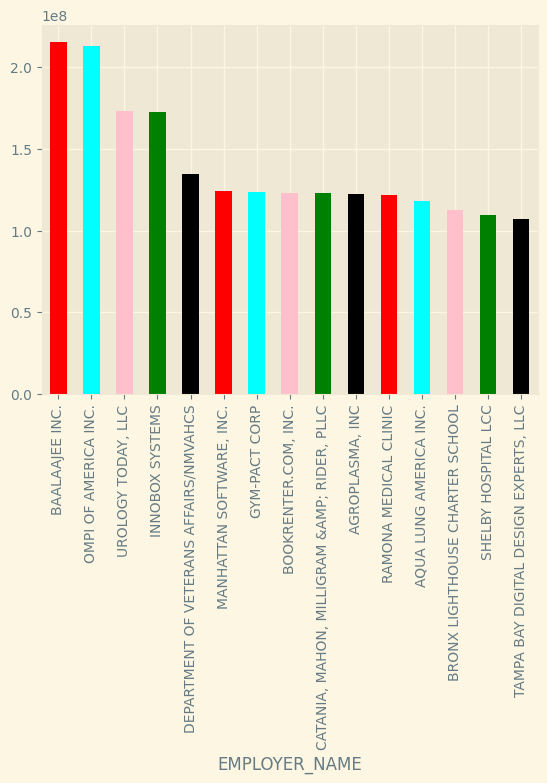

In [29]:
colors = ["red", "cyan", "pink", "green", "black"]
df.groupby("EMPLOYER_NAME")["PREVAILING_WAGE"].median().sort_values(ascending=False)[:15].plot(kind="bar", color=colors)
plt.show()

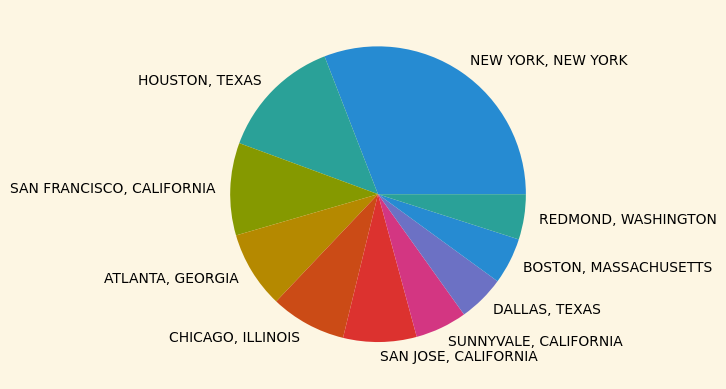

In [30]:
# top 20 worksite

ans = (df["WORKSITE"].value_counts()[:10]/df.shape[0])*100
labels = ans.index
values = ans.values
plt.pie(values, labels=labels)
plt.show()

In [31]:
df["WORKSITE"].value_counts().head(20)

NEW YORK, NEW YORK            190863
HOUSTON, TEXAS                 83385
SAN FRANCISCO, CALIFORNIA      62457
ATLANTA, GEORGIA               52008
CHICAGO, ILLINOIS              51167
SAN JOSE, CALIFORNIA           49582
SUNNYVALE, CALIFORNIA          34968
DALLAS, TEXAS                  31509
BOSTON, MASSACHUSETTS          31336
REDMOND, WASHINGTON            30574
CHARLOTTE, NORTH CAROLINA      30176
IRVING, TEXAS                  29316
MOUNTAIN VIEW, CALIFORNIA      29245
SAN DIEGO, CALIFORNIA          28656
SANTA CLARA, CALIFORNIA        27945
JERSEY CITY, NEW JERSEY        26822
SEATTLE, WASHINGTON            26745
AUSTIN, TEXAS                  26695
LOS ANGELES, CALIFORNIA        26393
PHILADELPHIA, PENNSYLVANIA     24104
Name: WORKSITE, dtype: int64

<AxesSubplot:xlabel='WORKSITE'>

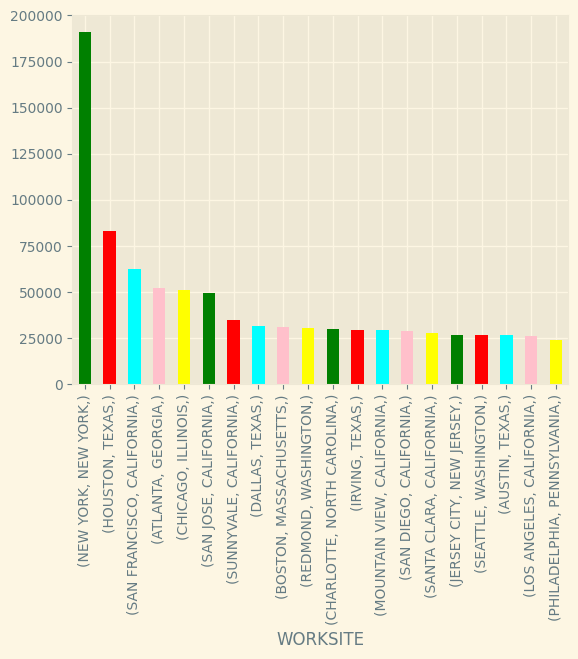

In [32]:
colors = ["green", "red", "cyan", "pink", "yellow"]
plots = df[["WORKSITE"]].value_counts().head(20)
plots.plot(kind="bar", color=colors)

In [33]:
#head of worksite column
df["WORKSITE"].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

In [34]:
# Show column names
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE'],
      dtype='object')

In [35]:
# Applying a function on DataFrame to gather only state name from worksite

xx = pd.DataFrame({"salary": np.random.randint(10000, 50000, 10), "rating": np.random.choice(["good", "avg", "bad"], 10)})

In [36]:
xx

,salary,rating
0,39306,good
1,26046,avg
2,32224,avg
3,14274,good
4,12457,good
5,30446,avg
6,31026,avg
7,18430,avg
8,36761,bad
9,25906,good


In [37]:
xx["rating_values"] = xx["rating"].map({"bad": 1, "avg": 3, "good": 5})

In [38]:
xx

,salary,rating,rating_values
0,39306,good,5
1,26046,avg,3
2,32224,avg,3
3,14274,good,5
4,12457,good,5
5,30446,avg,3
6,31026,avg,3
7,18430,avg,3
8,36761,bad,1
9,25906,good,5


In [39]:
df["WORKSITE"].unique()[:10]

array(['ANN ARBOR, MICHIGAN', 'PLANO, TEXAS', 'JERSEY CITY, NEW JERSEY',
       'DENVER, COLORADO', 'ST. LOUIS, MISSOURI', 'MIAMI, FLORIDA',
       'HOUSTON, TEXAS', 'SAN JOSE, CALIFORNIA', 'MEMPHIS, TEXAS',
       'VIENNA, VIRGINIA'], dtype=object)

In [40]:
def get_state(worksite_name):
    return worksite_name.split(",")[-1].upper()

In [41]:
ans = df["WORKSITE"].apply(get_state)

In [42]:
ans

0                MICHIGAN
1                   TEXAS
2              NEW JERSEY
3                COLORADO
4                MISSOURI
                ...      
2984604        CALIFORNIA
2984605              UTAH
2984606              OHIO
2984607     MASSACHUSETTS
2984608     MASSACHUSETTS
Name: WORKSITE, Length: 2984609, dtype: object

In [43]:
df["WORKSITE"] = df["WORKSITE"].apply(lambda worksite: worksite.split(',')[1])

In [44]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI


In [45]:
# from our analysis, we found that 'Mariana Islands' worksite name is replaced with NA values
# Replacing all NA records in Worksite column with value 'Mariana Islands'

ans.unique()

array([' MICHIGAN', ' TEXAS', ' NEW JERSEY', ' COLORADO', ' MISSOURI',
       ' FLORIDA', ' CALIFORNIA', ' VIRGINIA', ' PENNSYLVANIA',
       ' MASSACHUSETTS', ' WISCONSIN', ' ILLINOIS',
       ' DISTRICT OF COLUMBIA', ' NORTH CAROLINA', ' RHODE ISLAND',
       ' OHIO', ' WASHINGTON', ' GEORGIA', ' NEW YORK', ' INDIANA',
       ' MARYLAND', ' NEVADA', ' NEW HAMPSHIRE', ' LOUISIANA',
       ' MINNESOTA', ' SOUTH CAROLINA', ' ARIZONA', ' TENNESSEE',
       ' MISSISSIPPI', ' HAWAII', ' UTAH', ' DELAWARE', ' NA', ' KANSAS',
       ' CONNECTICUT', ' MAINE', ' NEBRASKA', ' OKLAHOMA', ' ARKANSAS',
       ' KENTUCKY', ' PUERTO RICO', ' ALASKA', ' WYOMING', ' IOWA',
       ' OREGON', ' IDAHO', ' NEW MEXICO', ' WEST VIRGINIA',
       ' SOUTH DAKOTA', ' NORTH DAKOTA', ' ALABAMA', ' VERMONT',
       ' MONTANA'], dtype=object)

In [46]:
ans.unique().shape

(53,)

In [47]:
df.loc[df["WORKSITE"] == "NA", "WORKSITE"] = "MARIANA ISLANDS"

In [48]:
df["WORKSITE"].unique()

array([' MICHIGAN', ' TEXAS', ' NEW JERSEY', ' COLORADO', ' MISSOURI',
       ' FLORIDA', ' CALIFORNIA', ' VIRGINIA', ' PENNSYLVANIA',
       ' MASSACHUSETTS', ' WISCONSIN', ' ILLINOIS',
       ' DISTRICT OF COLUMBIA', ' NORTH CAROLINA', ' RHODE ISLAND',
       ' OHIO', ' WASHINGTON', ' GEORGIA', ' NEW YORK', ' INDIANA',
       ' MARYLAND', ' NEVADA', ' NEW HAMPSHIRE', ' LOUISIANA',
       ' MINNESOTA', ' SOUTH CAROLINA', ' ARIZONA', ' TENNESSEE',
       ' MISSISSIPPI', ' HAWAII', ' UTAH', ' DELAWARE', ' NA', ' KANSAS',
       ' CONNECTICUT', ' MAINE', ' NEBRASKA', ' OKLAHOMA', ' ARKANSAS',
       ' KENTUCKY', ' PUERTO RICO', ' ALASKA', ' WYOMING', ' IOWA',
       ' OREGON', ' IDAHO', ' NEW MEXICO', ' WEST VIRGINIA',
       ' SOUTH DAKOTA', ' NORTH DAKOTA', ' ALABAMA', ' VERMONT',
       ' MONTANA'], dtype=object)

In [49]:
# Checking how many unique worksites are there

df["WORKSITE"].value_counts().head()

 CALIFORNIA    556014
 TEXAS         293213
 NEW YORK      290005
 NEW JERSEY    212420
 ILLINOIS      159831
Name: WORKSITE, dtype: int64

In [50]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE'],
      dtype='object')

In [51]:
df.rename(
    {'EMPLOYER_NAME':'EMPLOYER',
     'FULL_TIME_POSITION':'FULL_T',
     'PREVAILING_WAGE':'PREV_WAGE',
     'WORKSITE':'STATE',
     'lon':'LON',
     'lat':'LAT'},
    axis=1,
    inplace = True
)


In [52]:
#Now Remove all Columns Except these columns
#'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

new_df = df.loc[:, ['STATE','EMPLOYER','PREV_WAGE','CASE_STATUS','YEAR','SOC_NAME','JOB_TITLE','FULL_T']]

In [53]:
new_df.columns

Index(['STATE', 'EMPLOYER', 'PREV_WAGE', 'CASE_STATUS', 'YEAR', 'SOC_NAME',
       'JOB_TITLE', 'FULL_T'],
      dtype='object')

In [54]:
original = pd.read_csv("h1b_kaggle.csv")
df = pd.concat([new_df, original[['lon', 'lat']]], axis=1)


In [55]:
df

,STATE,EMPLOYER,PREV_WAGE,CASE_STATUS,YEAR,SOC_NAME,JOB_TITLE,FULL_T,lon,lat
0,MICHIGAN,UNIVERSITY OF MICHIGAN,36067.0,CERTIFIED-WITHDRAWN,2016.0,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,-83.743038,42.280826
1,TEXAS,"GOODMAN NETWORKS, INC.",242674.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,-96.698886,33.019843
2,NEW JERSEY,"PORTS AMERICA GROUP, INC.",193066.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,-74.077642,40.728158
3,COLORADO,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",220314.0,CERTIFIED-WITHDRAWN,2016.0,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,-104.990251,39.739236
4,MISSOURI,PEABODY INVESTMENTS CORP.,157518.4,WITHDRAWN,2016.0,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.005941,40.712784
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-97.134178,32.941236
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.909890,40.636768
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.780253,39.419550


In [ ]:
#Perform These Operations
#Precise LON and LAT columns upto 2 decimal palaces

#Convert YEAR Column into String

#Convert PREV_WAGE column into Integer

In [56]:
df["YEAR"].info()


<class 'pandas.core.series.Series'>
Int64Index: 3002458 entries, 0 to 3002457
Series name: YEAR
Non-Null Count    Dtype  
--------------    -----  
2984609 non-null  float64
dtypes: float64(1)
memory usage: 45.8 MB


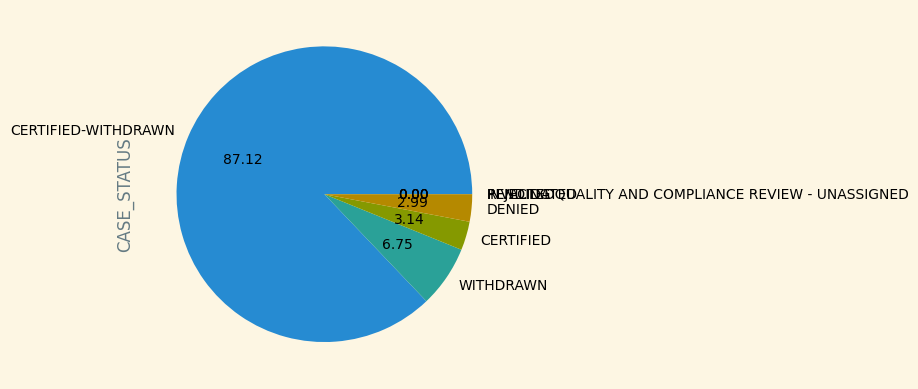

In [57]:
# Petitions by case status

label = df["CASE_STATUS"].unique()
value = df["CASE_STATUS"].unique()
case_counts = df["CASE_STATUS"].value_counts().plot(kind="pie", labels=label, autopct="%.2f")
plt.show()

In [58]:
# Calculating petitions distributions by year
# assuming the year column is named 'year' and the dataframe is named 'df'
year = df["YEAR"].value_counts()
s = list(year)
s.reverse()
s

[352116, 412371, 438499, 515136, 618706, 647781]

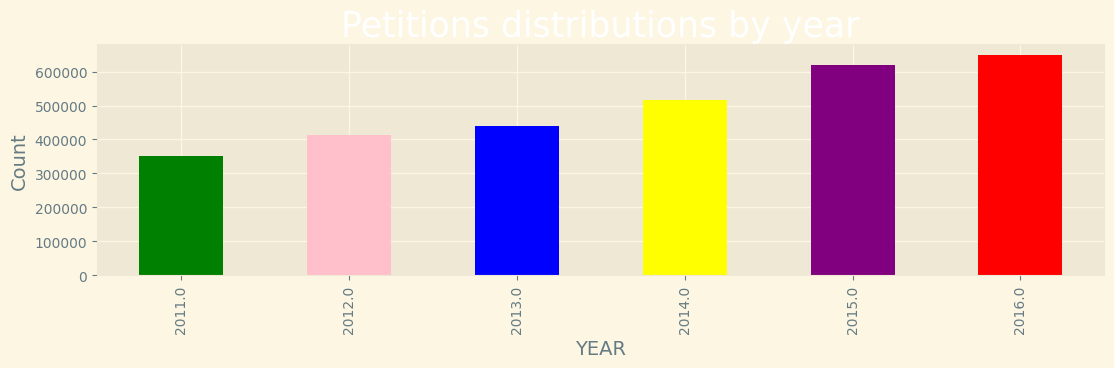

In [59]:
colors = ["green", "pink", "blue", "yellow", "purple", "red"]

df["YEAR"].value_counts()[::-1].plot(kind="bar", color=colors, figsize=(13, 3))
plt.title("Petitions distributions by year", fontsize=25, color="white")
plt.xlabel("YEAR", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


In [61]:
denied = df[df.CASE_STATUS == 'DENIED']
len(denied)
del denied['CASE_STATUS']
denied = denied.reset_index()
denied.head(3)

denied_year_count = [0]* 6
df["CASE_STATUS"].value_counts()["DENIED"]

93761

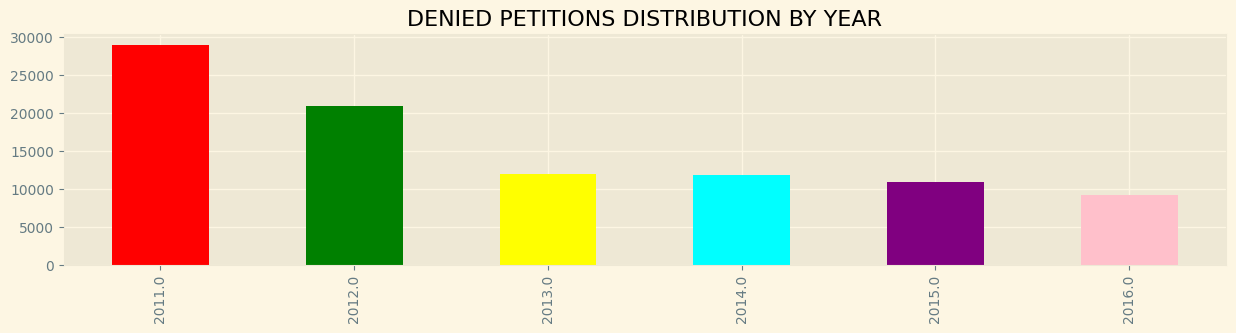

In [62]:
# Denied PETITIONS DISTRIBUTION BY YEAR
df[(df["CASE_STATUS"]=="DENIED")]["YEAR"].value_counts().plot(kind="bar",title=("DENIED PETITIONS DISTRIBUTION BY YEAR"), figsize=(15, 3), color = ["red", "green", "yellow", "cyan", "purple", "pink"])

plt.show()

In [63]:

# Denied % Rate By Year
p = df[["CASE_STATUS","YEAR"]]["YEAR"].value_counts()
s =df[(df["CASE_STATUS"]=="DENIED")]["YEAR"].value_counts()
DF = pd.DataFrame(p)
DF2 = pd.DataFrame(s)
new = pd.concat([DF, DF2], axis=1)
new.columns=["ALL", "DENIED"]
sf = new["DENIED"]/new["ALL"]*100
no = pd.DataFrame(sf)
no.columns = ["Denied Ratio %"]
no["Denied Ratio %"] = no["Denied Ratio %"].round(2)

no.T

,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0
Denied Ratio %,1.42,1.76,2.29,2.74,5.07,8.23


<AxesSubplot:title={'center':'Denied % Rate By Year'}>

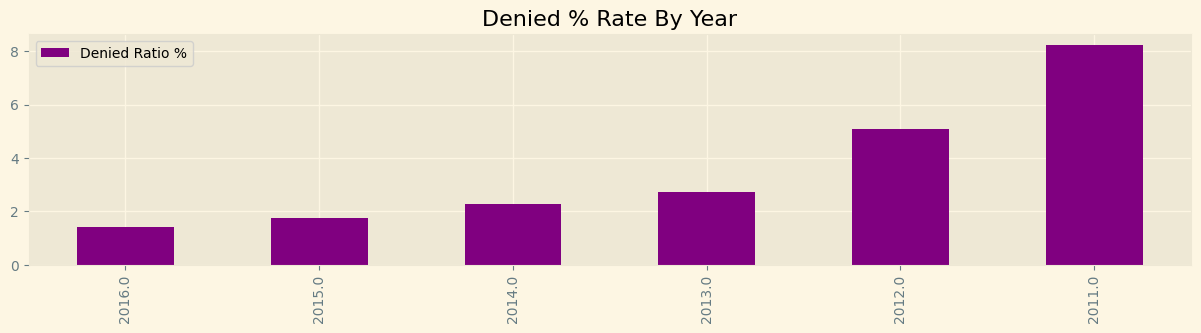

In [64]:
# df["CASE_STATUS"].value_counts()
color = ["green",  "yellow", "cyan", "purple", "pink"]
no.plot(kind="bar", color = "purple", title=("Denied % Rate By Year"), figsize=(15, 3))

In [65]:
# Calculate the number of petitions filed by the States

# Remove NaN before sorting
num_petition = df["STATE"].dropna().unique().tolist()
num_petition.sort()
print(num_petition)
print("Total states:", len(num_petition))



[' ALABAMA', ' ALASKA', ' ARIZONA', ' ARKANSAS', ' CALIFORNIA', ' COLORADO', ' CONNECTICUT', ' DELAWARE', ' DISTRICT OF COLUMBIA', ' FLORIDA', ' GEORGIA', ' HAWAII', ' IDAHO', ' ILLINOIS', ' INDIANA', ' IOWA', ' KANSAS', ' KENTUCKY', ' LOUISIANA', ' MAINE', ' MARYLAND', ' MASSACHUSETTS', ' MICHIGAN', ' MINNESOTA', ' MISSISSIPPI', ' MISSOURI', ' MONTANA', ' NA', ' NEBRASKA', ' NEVADA', ' NEW HAMPSHIRE', ' NEW JERSEY', ' NEW MEXICO', ' NEW YORK', ' NORTH CAROLINA', ' NORTH DAKOTA', ' OHIO', ' OKLAHOMA', ' OREGON', ' PENNSYLVANIA', ' PUERTO RICO', ' RHODE ISLAND', ' SOUTH CAROLINA', ' SOUTH DAKOTA', ' TENNESSEE', ' TEXAS', ' UTAH', ' VERMONT', ' VIRGINIA', ' WASHINGTON', ' WEST VIRGINIA', ' WISCONSIN', ' WYOMING']
Total states: 53


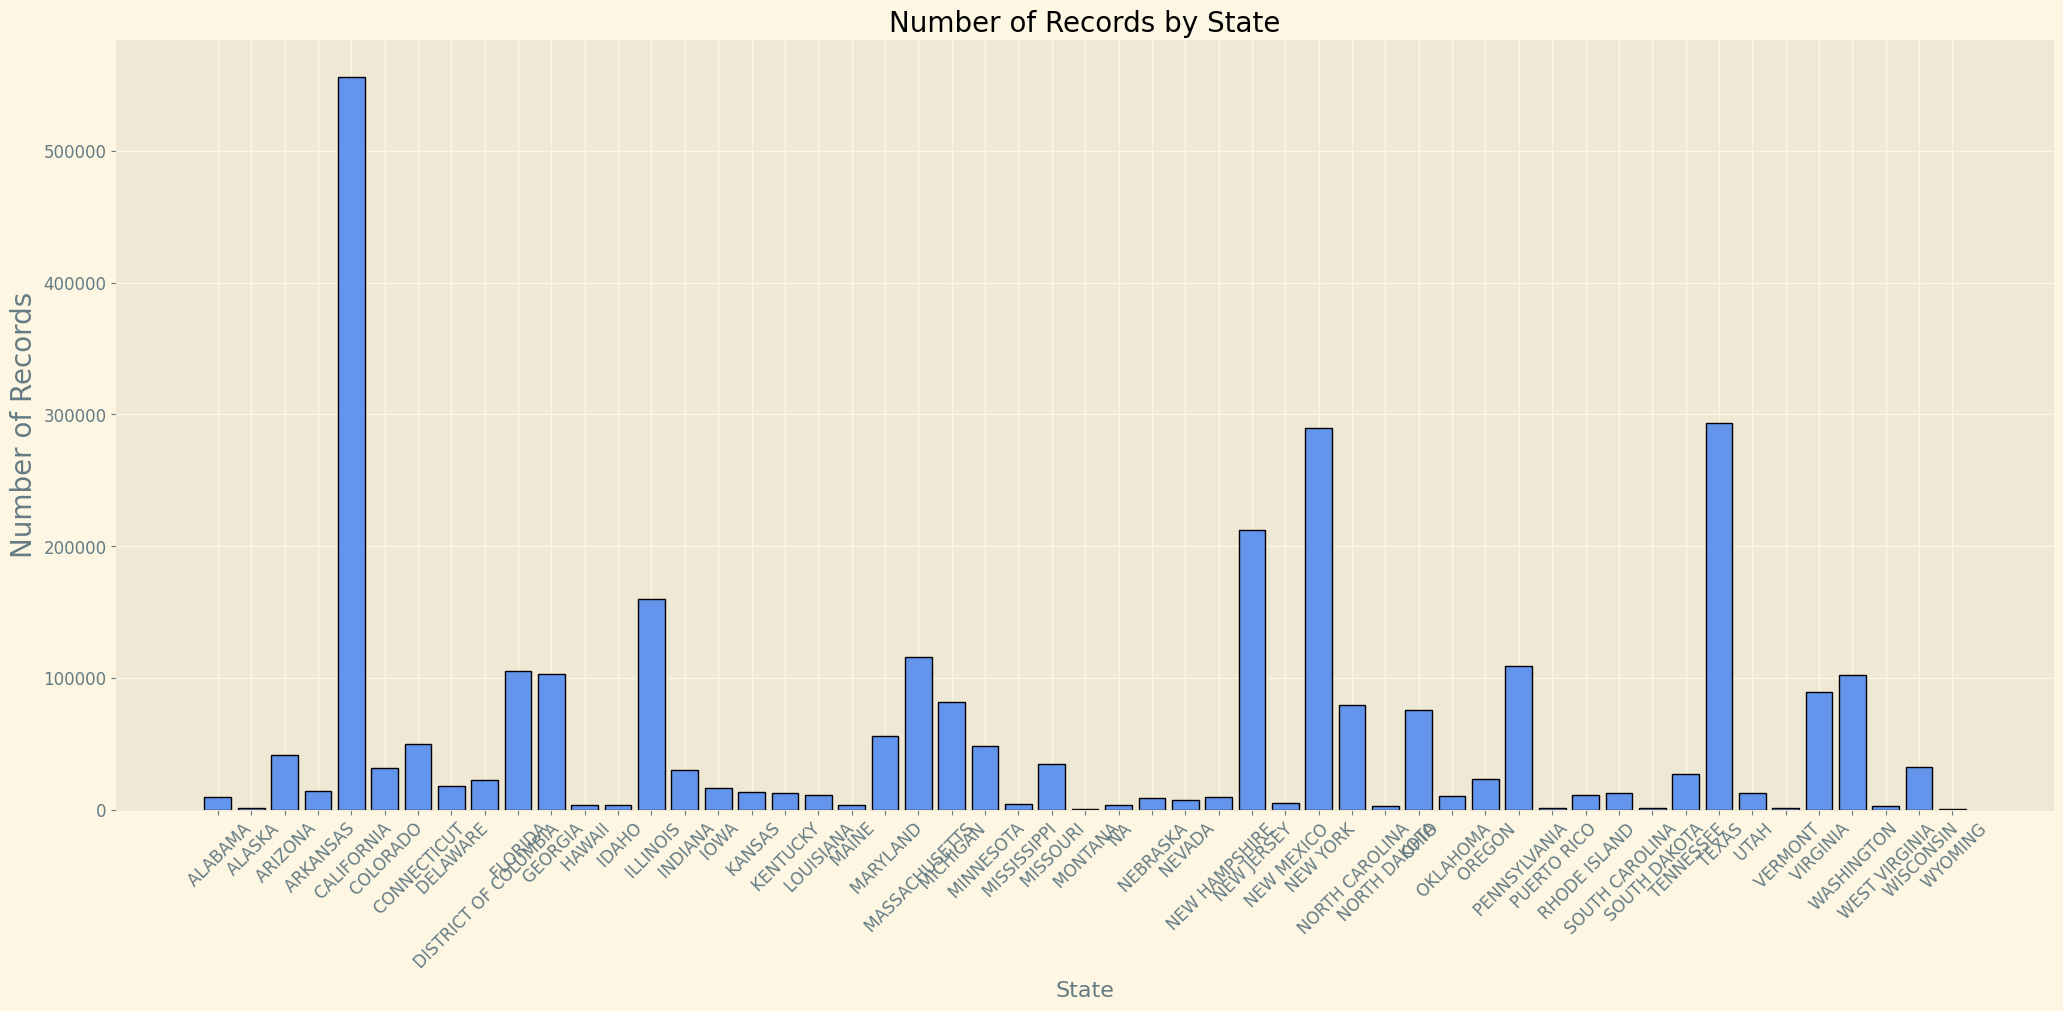

In [66]:
import matplotlib.pyplot as plt

# create a bar plot with custom colors and edge color
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(df["STATE"].value_counts().sort_index().index, 
       df["STATE"].value_counts().sort_index().values, 
       color="cornflowerblue", edgecolor="black")

# set plot title and axes labels
ax.set_title("Number of Records by State", fontsize=20)
ax.set_xlabel("State", fontsize=16)
ax.set_ylabel("Number of Records", fontsize=20)

# set x-tick labels rotation angle and font size
plt.xticks(rotation=45, fontsize=12)

# set y-tick font size
plt.yticks(fontsize=12)

# remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
